In [21]:
import cv2
import numpy as np
from utils.rboxs_utils import poly_filter, poly2rbox, rbox2poly

In [22]:
labels = np.loadtxt('./debug/000002.txt')

In [23]:
labels

array([[1199.,  523., 1260.,  620., 1153.,  687., 1092.,  590.,    0.],
       [1119.,  579., 1185.,  798.,  255., 1080.,    0.,  918.,    0.],
       [1362.,  305., 1443.,  149., 1919.,  396., 1890.,  580.,    0.]])

In [120]:
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rbox2poly(rboxs)
# -4.80174902e-01 * 180/np.pi

array([[1.19918810e+03, 5.22882239e+02, 1.26000011e+03, 6.19999940e+02,
        1.15281215e+03, 6.87117639e+02, 1.09200013e+03, 5.89999938e+02],
       [1.11899997e+03, 5.78999984e+02, 1.18538816e+03, 7.98139752e+02,
        6.63882165e+01, 1.13713979e+03, 1.97774836e-05, 9.18000019e+02],
       [1.97157233e+03, 4.23381376e+02, 1.89000013e+03, 5.80000053e+02,
        1.36180340e+03, 3.04897677e+02, 1.44337560e+03, 1.48279000e+02]])

In [19]:
poly2rbox(polys=labels[:, :8], use_pi=False)

array([[1176.00012207,  604.99993896,  126.46756744,  114.58599091,
         122.05349731],
       [ 592.6940918 ,  858.06988525, 1169.22277832,  228.97517395,
         106.85414124],
       [1666.68786621,  364.13952637,  595.54437256,  176.58831787,
          62.48799896]])

In [141]:
import matplotlib.pyplot as plt

In [142]:
img = np.zeros((1080,1920,3), dtype=np.uint8)

In [143]:
labels = labels.astype(int)

In [144]:
# img = cv2.circle(img, center=(labels[1,0], labels[1,1]), radius=10, thickness=8, color=(255,255,0))

In [145]:
# black_img = cv2.circle(black_img, center=(100, 100), radius=10, thickness=8, color=(255,255,0))

In [146]:
# (int(labels[1,1]), int(labels[1,0]))

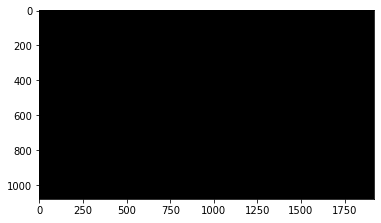

In [147]:
plt.imshow(img)

In [148]:
# np.max(black_img), black_img.shape

In [149]:
ind = 2
box = labels[ind,:]

In [150]:
img = cv2.circle(img, center=(box[0], box[1]), radius=5, thickness=4, color=(255,0,0))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,255,255), 2)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,255,255), 2)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,255,255), 2)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,255,255), 2)

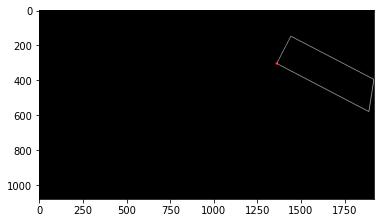

In [151]:
plt.imshow(img)

In [152]:
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rpolys = rbox2poly(rboxs)
rpolys = rpolys.astype(int)

In [153]:
labels[:, :8], rboxs, rpolys

(array([[1199,  523, 1260,  620, 1153,  687, 1092,  590],
        [1119,  579, 1185,  798,  255, 1080,    0,  918],
        [1362,  305, 1443,  149, 1919,  396, 1890,  580]]),
 array([[ 1.17600012e+03,  6.04999939e+02,  1.26467567e+02,
          1.14585991e+02,  5.59438949e-01],
        [ 5.92694092e+02,  8.58069885e+02,  1.16922278e+03,
          2.28975174e+02,  2.94160196e-01],
        [ 1.66668787e+03,  3.64139526e+02,  5.95544373e+02,
          1.76588318e+02, -4.80174902e-01]]),
 array([[1199,  522, 1260,  619, 1152,  687, 1092,  589],
        [1118,  578, 1185,  798,   66, 1137,    0,  918],
        [1971,  423, 1890,  580, 1361,  304, 1443,  148]]))

In [154]:
box = rpolys[ind,:]
img = cv2.circle(img, center=(box[0], box[1]), radius=20, thickness=4, color=(255,0,255))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,0,255), 2)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,0,255), 2)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,0,255), 2)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,0,255), 2)

-27.511995313888363


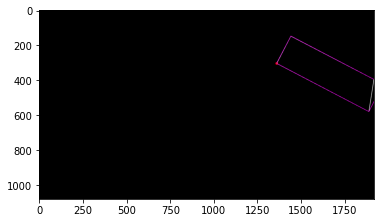

In [156]:
plt.imshow(img)
print(rboxs[ind, -1]*180/np.pi)

In [163]:
# determine the order of the first point
GT_point = labels[ind, :4]
GT_point, box.reshape((-1,2))

(array([1362,  305, 1443,  149]),
 array([[1971,  423],
        [1890,  580],
        [1361,  304],
        [1443,  148]]))

In [164]:
box_array = box.reshape((-1,2))
dist = [np.linalg.norm(box_array[index%4, :] - labels[ind, :2]) + np.linalg.norm(box_array[(index+1)%4, :] - labels[ind, 2:4]) for index in range(4)]
topleft_index = np.argmin(dist)
print(topleft_index)

2


In [165]:
# use simple rules to determine the first point from GT information
rboxs[ind, -1]
# determine the real first point is in which point
order = topleft_index + 1 #

if rboxs[ind, -1] < 0:
    # determine the direction according to the point order
    if order == 1:
        label = 0
    if order == 2:
        label = 1
    if order == 3:
        label = 2
    if order == 4:
        label = 3
if rboxs[ind, -1] >= 0:
    # determine the direction according to the point order
    if order == 2:
        label = 0
    if order == 3:
        label = 1
    if order == 4:
        label = 2
    if order == 1:
        label = 3

print('the corresponding label is: ', label)

the corresponding label is:  2


theta:  -34.273701213063305
the corresponding label is:  2


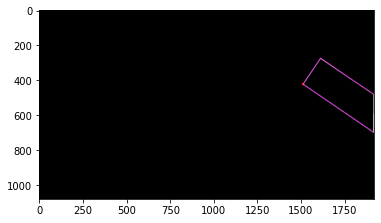

In [184]:
# merged
labels = np.loadtxt('./debug/000005.txt')

img = np.zeros((1080,1920,3), dtype=np.uint8)
labels = labels.astype(int)
# test with the index, plot the original poly infos
ind = 1
box = labels[ind,:]

img = cv2.circle(img, center=(box[0], box[1]), radius=5, thickness=4, color=(255,0,0))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,255,255), 4)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,255,255), 4)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,255,255), 4)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,255,255), 4)

# test with the index, plot the converted poly infos
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rpolys = rbox2poly(rboxs) # converted back
rpolys = rpolys.astype(int)
box = rpolys[ind,:]
img = cv2.circle(img, center=(box[0], box[1]), radius=20, thickness=4, color=(255,0,255))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,0,255), 2)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,0,255), 2)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,0,255), 2)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,0,255), 2)

print('theta: ', rboxs[ind, -1]*180/np.pi)
box_array = box.reshape((-1,2))
dist = [np.linalg.norm(box_array[index%4, :] - labels[ind, :2]) + np.linalg.norm(box_array[(index+1)%4, :] - labels[ind, 2:4]) for index in range(4)]
topleft_index = np.argmin(dist)
# print('top left index: ', topleft_index)

# use simple rules to determine the first point from GT information
# rboxs[ind, -1]
# determine the real first point is in which point
order = topleft_index + 1 #

if rboxs[ind, -1] < 0:
    # determine the direction according to the point order
    if order == 1:
        label = 0
    if order == 2:
        label = 1
    if order == 3:
        label = 2
    if order == 4:
        label = 3
if rboxs[ind, -1] >= 0:
    # determine the direction according to the point order
    if order == 2:
        label = 0
    if order == 3:
        label = 1
    if order == 4:
        label = 2
    if order == 1:
        label = 3
plt.imshow(img)
print('the corresponding label is: ', label)